In [83]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import PandasTools
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [56]:
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_type').only(['indication_class', 
                                                                              'molecule_chembl_id', 
                                                                              'molecule_type', 
                                                                              'pref_name'])

df = pd.DataFrame(approved_drugs)
df

,indication_class,molecule_chembl_id,molecule_type,pref_name
0,None,CHEMBL4297774,Antibody,AMIVANTAMAB
1,None,CHEMBL1743007,Antibody,DARATUMUMAB
2,None,CHEMBL3301582,Antibody,POLATUZUMAB VEDOTIN
3,None,CHEMBL3301587,Antibody,DURVALUMAB
4,None,CHEMBL3301589,Antibody,ENFORTUMAB VEDOTIN
...,...,...,...,...
4187,Anti-Eczematic (topical),CHEMBL2108232,Unknown,COAL TAR
4188,Carminative; Stomachic; Counterirritant (exter...,CHEMBL2108236,Unknown,CAPSICUM
4189,None,CHEMBL2108245,Unknown,CREOSOTE CARBONATE
4190,Hemostatic (local),CHEMBL2108268,Unknown,"CELLULOSE, OXIDIZED"


In [57]:
df = df[df['molecule_type'] == 'Small molecule']
df.reset_index(drop=True, inplace=True)
df

,indication_class,molecule_chembl_id,molecule_type,pref_name
0,Anticholinergic,CHEMBL1240,Small molecule,PROPANTHELINE BROMIDE
1,Antihistaminic,CHEMBL1241,Small molecule,TRIPELENNAMINE
2,Analgesic (urinary tract),CHEMBL1242,Small molecule,PHENAZOPYRIDINE
3,None,CHEMBL141305,Small molecule,CYCLOFENIL
4,None,CHEMBL139877,Small molecule,SULFACARBAMIDE
...,...,...,...,...
3587,None,CHEMBL3989678,Small molecule,PIPERAZINE CITRATE
3588,None,CHEMBL3989691,Small molecule,ELTROMBOPAG OLAMINE
3589,None,CHEMBL3989693,Small molecule,LEVALBUTEROL TARTRATE
3590,None,CHEMBL3989694,Small molecule,OLANZAPINE PAMOATE


In [58]:
df = df.drop_duplicates(ignore_index=True)
df


,indication_class,molecule_chembl_id,molecule_type,pref_name
0,Anticholinergic,CHEMBL1240,Small molecule,PROPANTHELINE BROMIDE
1,Antihistaminic,CHEMBL1241,Small molecule,TRIPELENNAMINE
2,Analgesic (urinary tract),CHEMBL1242,Small molecule,PHENAZOPYRIDINE
3,None,CHEMBL141305,Small molecule,CYCLOFENIL
4,None,CHEMBL139877,Small molecule,SULFACARBAMIDE
...,...,...,...,...
3210,None,CHEMBL3989678,Small molecule,PIPERAZINE CITRATE
3211,None,CHEMBL3989691,Small molecule,ELTROMBOPAG OLAMINE
3212,None,CHEMBL3989693,Small molecule,LEVALBUTEROL TARTRATE
3213,None,CHEMBL3989694,Small molecule,OLANZAPINE PAMOATE


In [59]:
compounds_provider = molecule.filter(
    molecule_chembl_id__in=list(df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [60]:
compounds = list(tqdm(compounds_provider))

100%|██████████| 3215/3215 [11:11<00:00,  4.79it/s]


In [61]:
drug_approved_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3215, 2)


In [62]:
drug_approved_df

,molecule_chembl_id,molecule_structures
0,CHEMBL2,{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...
1,CHEMBL3,"{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '..."
2,CHEMBL4,{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...
3,CHEMBL5,{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...
4,CHEMBL6,{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...
...,...,...
3210,CHEMBL5095049,{'canonical_smiles': 'C1=C/COCc2cc(ccc2OCCN2CC...
3211,CHEMBL5095050,{'canonical_smiles': 'CCCCCCCCCCCCOS(=O)(=O)O....
3212,CHEMBL5095051,{'canonical_smiles': 'COc1ccc(C(CN(C)C)C2(O)CC...
3213,CHEMBL5095496,None


In [63]:
drug_approved_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [64]:
canonical_smiles = []

for i, compounds in drug_approved_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

drug_approved_df["smiles"] = canonical_smiles
drug_approved_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [65]:
drug_approved_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [66]:
df.columns

Index(['indication_class', 'molecule_chembl_id', 'molecule_type', 'pref_name'], dtype='object')

In [67]:
drug_approved_df.columns

Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [101]:
output_df = pd.merge(
    df[['molecule_chembl_id']],
    drug_approved_df,
    on='molecule_chembl_id'
)

output_df.drop_duplicates(inplace=True)
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")


Dataset with 3012 entries.


In [102]:
output_df

,molecule_chembl_id,smiles
0,CHEMBL1240,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...
1,CHEMBL1241,CN(C)CCN(Cc1ccccc1)c1ccccn1
2,CHEMBL1242,Nc1ccc(/N=N/c2ccccc2)c(N)n1
3,CHEMBL141305,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1
4,CHEMBL139877,NC(=O)NS(=O)(=O)c1ccc(N)cc1
...,...,...
3007,CHEMBL3989678,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...
3008,CHEMBL3989691,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...
3009,CHEMBL3989693,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...
3010,CHEMBL3989694,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...


In [103]:
output_df.insert(2, 'type', 'approved_drug')
output_df

,molecule_chembl_id,smiles,type
0,CHEMBL1240,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...,approved_drug
1,CHEMBL1241,CN(C)CCN(Cc1ccccc1)c1ccccn1,approved_drug
2,CHEMBL1242,Nc1ccc(/N=N/c2ccccc2)c(N)n1,approved_drug
3,CHEMBL141305,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,approved_drug
4,CHEMBL139877,NC(=O)NS(=O)(=O)c1ccc(N)cc1,approved_drug
...,...,...,...
3007,CHEMBL3989678,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...,approved_drug
3008,CHEMBL3989691,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,approved_drug
3009,CHEMBL3989693,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,approved_drug
3010,CHEMBL3989694,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...,approved_drug


In [104]:
approved_drugs_mol = []

for _, smiles, type in output_df[['smiles', 'type']].itertuples():
    approved_drugs_mol.append((Chem.MolFromSmiles(smiles), type))
approved_drugs_mol[:5]

[17:07:24] WARNING: not removing hydrogen atom without neighbors
[17:07:24] WARNING: not removing hydrogen atom without neighbors
[17:07:24] WARNING: not removing hydrogen atom without neighbors
[17:07:24] WARNING: not removing hydrogen atom without neighbors


[(<rdkit.Chem.rdchem.Mol at 0x289ddca2180>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x289ddca2e30>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x289ddca26c0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x289ddca25e0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x289ddca30d0>, 'approved_drug')]

In [105]:
approved_drugs_structure = pd.DataFrame(approved_drugs_mol, columns=['structure', 'type'])
approved_drugs_structure.shape

(3012, 2)

In [107]:
df2 = pd.read_csv('pIC50.csv')
df2 = df2[['smiles', 'bioactivity']]
df2

,smiles,bioactivity
0,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active
1,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active
2,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active
3,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,Active
4,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,Active
...,...,...
401,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active
402,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active
403,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active
404,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active


In [108]:
gpr6_compounds_mol = []

for _, smiles, type in df2[['smiles', 'bioactivity']].itertuples():
    gpr6_compounds_mol.append((Chem.MolFromSmiles(smiles), type))
gpr6_compounds_mol[:5]

[(<rdkit.Chem.rdchem.Mol at 0x289e1ccf0d0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x289e1cceff0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x289e1ccf450>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x289e1cceb90>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x289e1ccf3e0>, 'Active')]

In [109]:
gpr6_compounds_structure = pd.DataFrame(gpr6_compounds_mol, columns=['structure', 'type'])
gpr6_compounds_structure.head()

,structure,type
0,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active


In [116]:
df_all = pd.concat([approved_drugs_structure, gpr6_compounds_structure])
df_all

,structure,type
0,<rdkit.Chem.rdchem.Mol object at 0x00000289DDC...,approved_drug
1,<rdkit.Chem.rdchem.Mol object at 0x00000289DDC...,approved_drug
2,<rdkit.Chem.rdchem.Mol object at 0x00000289DDC...,approved_drug
3,<rdkit.Chem.rdchem.Mol object at 0x00000289DDC...,approved_drug
4,<rdkit.Chem.rdchem.Mol object at 0x00000289DDC...,approved_drug
...,...,...
401,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
402,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
403,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active
404,<rdkit.Chem.rdchem.Mol object at 0x00000289E1C...,Active


In [120]:
from rdkit.Chem import MACCSkeys

In [121]:
def generate_maccs(data):
    maccs_fingerprint = [MACCSkeys.GenMACCSKeys(mol) for mol in data]
    return maccs_fingerprint

maccsfp = generate_maccs(df_all.structure[:])
print("Number of compounds converted:", len(maccsfp))
print("Fingerprint length per compound:", len(maccsfp[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 167


In [122]:
fp_name_maccs = [f'Bit_{i}' for i in range(167)]
fp_bits_maccs = [list(l) for l in maccsfp]

maccsfp_df = pd.DataFrame(fp_bits_maccs, index=df_all["type"], columns=fp_name_maccs)
maccsfp_df.reset_index(inplace=True)
maccsfp_df.rename(columns={"index": "type"})
maccsfp_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [123]:
maccsfp_df_umap = maccsfp_df.iloc[:, 1:]
maccsfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3414,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3415,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
3416,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [124]:
import umap.umap_ as umap
import umap.plot

c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.

In [165]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_maccs = umapper.fit_transform(maccsfp_df_umap)

data_umap_maccs_x = pd.DataFrame(data_umap_maccs[:, 0], columns = ['x'])
data_umap_maccs_y = pd.DataFrame(data_umap_maccs[:, 1], columns = ['y'])
type = pd.DataFrame(maccsfp_df["type"].values, columns = ['type'])
plot_umap_maccs = pd.concat([type, data_umap_maccs_x, data_umap_maccs_y], axis = 1)
plot_umap_maccs

,type,x,y
0,approved_drug,6.858024,15.414828
1,approved_drug,7.185917,14.140711
2,approved_drug,5.775995,12.526251
3,approved_drug,2.841263,12.423751
4,approved_drug,4.540323,5.093729
...,...,...,...
3413,Active,11.021291,13.179295
3414,Active,11.331469,12.334942
3415,Active,6.043447,5.384452
3416,Active,5.987909,5.331784


In [128]:
import seaborn as sns

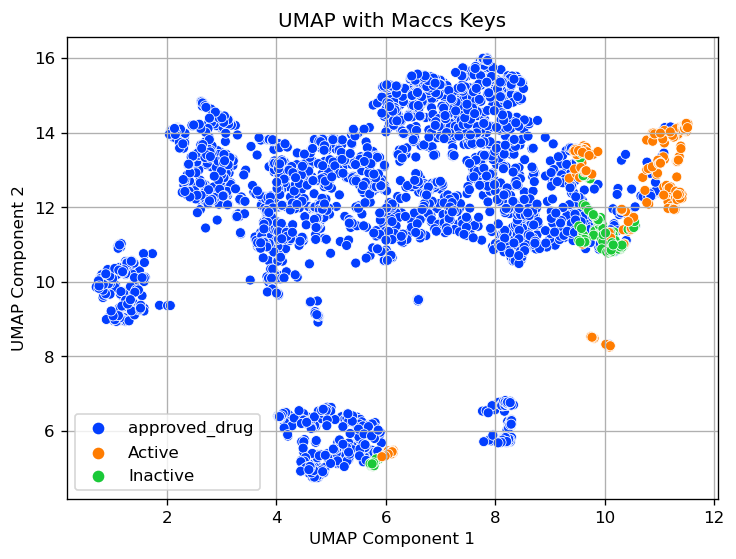

In [166]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_maccs, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Maccs Keys', fontsize=12)
plt.show()

In [135]:
from rdkit.Chem import AllChem

In [156]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(df_all.structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 2048


In [157]:
fp_name_morgan = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan = [list(l) for l in mfpts]

morganfp_df = pd.DataFrame(fp_bits_morgan, index=df_all["type"], columns=fp_name_morgan)
morganfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_df.rename(columns={"index": "type"})# Rename the index column to "cid"
morganfp_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,approved_drug,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,approved_drug,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
morganfp_df_umap = morganfp_df.iloc[:, 1:]
morganfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3414,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3415,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3416,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [163]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_morgan = umapper.fit_transform(morganfp_df_umap)

data_umap_morgan_x = pd.DataFrame(data_umap_morgan[:, 0], columns = ['x'])
data_umap_morgan_y = pd.DataFrame(data_umap_morgan[:, 1], columns = ['y'])
type = pd.DataFrame(morganfp_df["type"].values, columns = ['type'])
plot_umap_morgan = pd.concat([type, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
plot_umap_morgan

,type,x,y
0,approved_drug,15.634322,2.578753
1,approved_drug,18.336527,1.797491
2,approved_drug,17.720823,2.718028
3,approved_drug,15.909713,3.009954
4,approved_drug,17.663269,5.365952
...,...,...,...
3413,Active,17.173777,11.219766
3414,Active,16.970881,11.853987
3415,Active,16.185356,10.640250
3416,Active,16.023146,10.681435


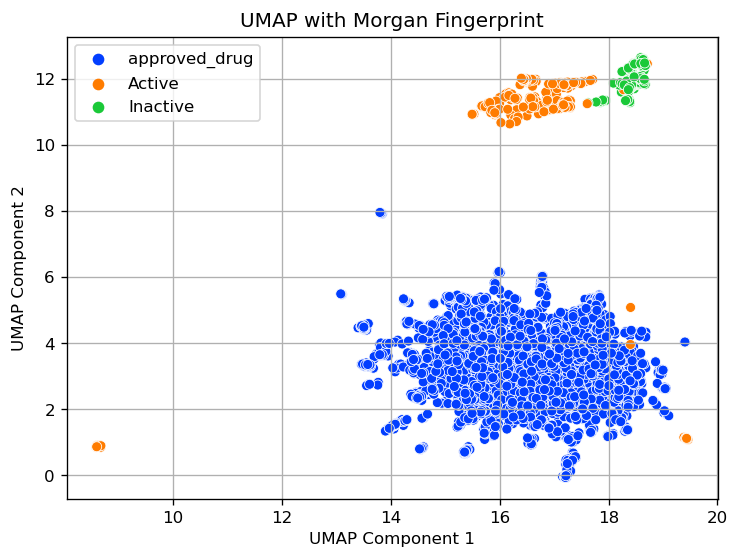

In [164]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_morgan, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP with Morgan Fingerprint', fontsize=12)
plt.show()

In [183]:
def generate_rdk5(data):
    rdk5_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    rdk5_fingerprint = [rdk5_gen.GetFingerprint(mol) for mol in data]
    return rdk5_fingerprint

rdk5fp = generate_rdk5(df_all.structure[:])
print("Number of compounds converted:", len(rdk5fp))
print("Fingerprint length per compound:", len(rdk5fp[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 2048


In [184]:
fp_name_rdk5 = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5 = [list(l) for l in rdk5fp]

rdk5_df = pd.DataFrame(fp_bits_rdk5, index=df_all["type"], columns=fp_name_rdk5)
rdk5_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df.rename(columns={"index": "type"})# Rename the index column to "cid"
rdk5_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,approved_drug,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,approved_drug,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,approved_drug,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,approved_drug,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [185]:
rdk5_df_umap = rdk5_df.iloc[:, 1:]
rdk5_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3414,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3415,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3416,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [186]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=2,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_rdk5 = umapper.fit_transform(rdk5_df_umap)

data_umap_rdk5_x = pd.DataFrame(data_umap_rdk5[:, 0], columns = ['x'])
data_umap_rdk5_y = pd.DataFrame(data_umap_rdk5[:, 1], columns = ['y'])
type = pd.DataFrame(rdk5_df["type"].values, columns = ['type'])
plot_umap_rdk5 = pd.concat([type, data_umap_rdk5_x, data_umap_rdk5_y], axis=1)
plot_umap_rdk5

,type,x,y
0,approved_drug,-11.979445,1.128742
1,approved_drug,-14.161465,5.319771
2,approved_drug,-18.198063,8.515716
3,approved_drug,-15.552320,3.445029
4,approved_drug,-15.637712,7.444217
...,...,...,...
3413,Active,-2.422610,6.950202
3414,Active,-4.188874,6.961614
3415,Active,-5.550706,6.276735
3416,Active,-5.555776,6.279003


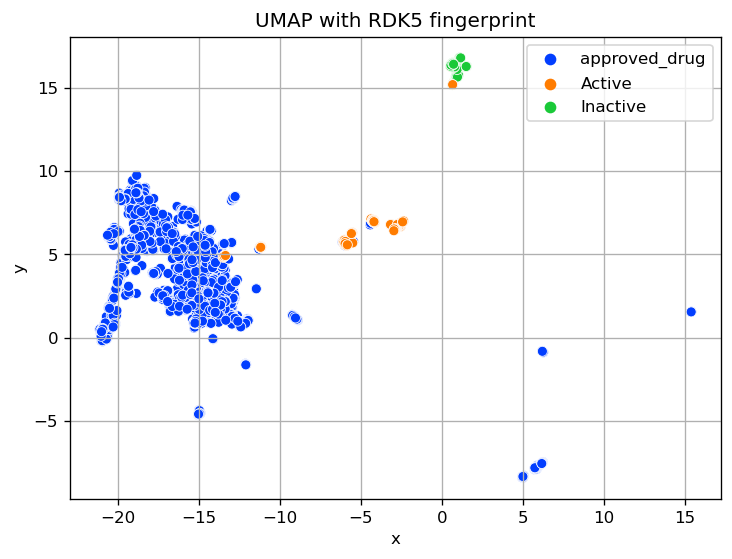

In [187]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_rdk5, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP with RDK5 fingerprint', fontsize=12)
plt.show()